# Прогнозирование оттока клиентов банка на основе машинного обучения

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Рассмотрение-баланса-и-подготовка-признаков" data-toc-modified-id="Рассмотрение-баланса-и-подготовка-признаков-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Рассмотрение баланса и подготовка признаков</a></span></li><li><span><a href="#Рассмотрение-дерева-решений" data-toc-modified-id="Рассмотрение-дерева-решений-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Рассмотрение дерева решений</a></span></li><li><span><a href="#Рассмотрение-случайного-леса" data-toc-modified-id="Рассмотрение-случайного-леса-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Рассмотрение случайного леса</a></span></li><li><span><a href="#Рассмотрение-логистической-регрессии" data-toc-modified-id="Рассмотрение-логистической-регрессии-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Рассмотрение логистической регрессии</a></span></li><li><span><a href="#Проверка-на-адекватность" data-toc-modified-id="Проверка-на-адекватность-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Проверка на адекватность</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Масштабирование" data-toc-modified-id="Масштабирование-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Масштабирование</a></span></li><li><span><a href="#Upsample-(Увеличение-выборки)" data-toc-modified-id="Upsample-(Увеличение-выборки)-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Upsample (Увеличение выборки)</a></span></li><li><span><a href="#Балансировка-гиперпараметром-&quot;class_weight&quot;" data-toc-modified-id="Балансировка-гиперпараметром-&quot;class_weight&quot;-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Балансировка гиперпараметром "class_weight"</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span><ul class="toc-item"><li><span><a href="#Факторы,-влияющие-на-уход-клиентов." data-toc-modified-id="Факторы,-влияющие-на-уход-клиентов.-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Факторы, влияющие на уход клиентов.</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

В данном проекте будет построена модель для оцени метрики *F1*.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка и обработка данных

Изначально импортируем необходимые библиотеки.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.utils import shuffle
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    confusion_matrix
)

Загружаем данные.

In [2]:
data = pd.read_csv(r'datasets\Churn.csv')

Выведем краткую информацию по датафрейму.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [4]:
data['Tenure'].value_counts()

Tenure
1.0     952
2.0     950
8.0     933
3.0     928
5.0     927
7.0     925
4.0     885
9.0     882
6.0     881
10.0    446
0.0     382
Name: count, dtype: int64

В признаке `Tenure` было обнаружено около 9% пропусков. Так как удаление таких наблюдений привело бы к существенной потере данных, пропуски были заполнены медианным значением признака. После заполнения признак был приведён к целочисленному типу.

In [5]:
data['Tenure'] = data['Tenure'].fillna(data['Tenure'].median()).astype(int)

Проверим.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Теперь в датасете нет пропусков.

Кратко взглянем на общую информацию о датасете.

In [7]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.99790,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.76001,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.00000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.00000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.00000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.00000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.00000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


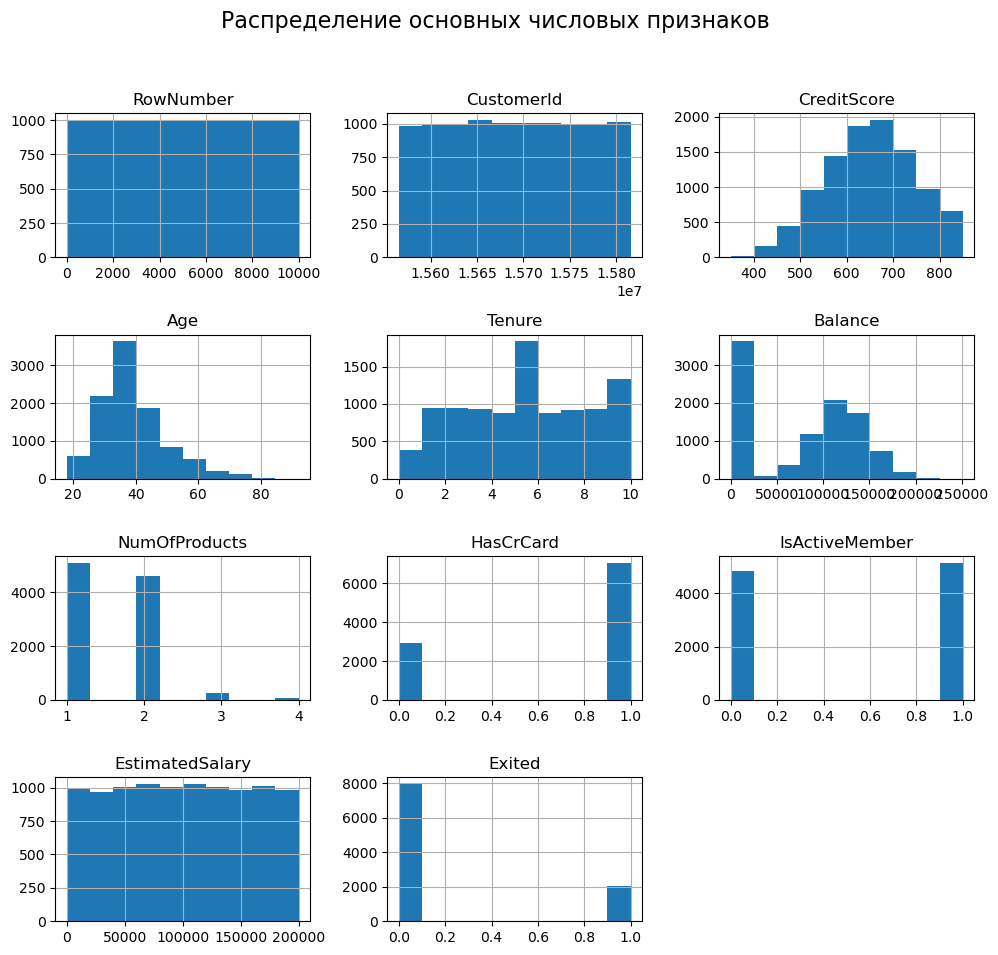

In [9]:
import matplotlib.pyplot as plt

data.hist(figsize=(10, 10))
plt.suptitle('Распределение основных числовых признаков', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Видно, что уже была проведена предобработка.

Датасет содержит 10 000 наблюдений и 14 признаков, целевой признак — `Exited`. По describe() видно, что числовые признаки имеют адекватные диапазоны, явных аномалий не наблюдается. По гистограммам заметно, что `Exited` распределён неравномерно (класс 1 встречается существенно реже), поэтому при обучении модели потребуется учитывать дисбаланс.

## Исследование задачи

### Рассмотрение баланса и подготовка признаков

Изначально рассмотрим баланс классов.

In [10]:
data['Exited'].value_counts(normalize=True)

Exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64

Классы целевого признака несбалансированы: доля ушедших клиентов составляет около 20%, что может негативно влиять на обучение моделей без учета дисбаланса.

Работать с балансом мы будем в следующей части работы, сейчас подготовкой данных к обучению.

Удалим неинформативные признаки - `RowNumber`, `CustomedId`, `Surname`.

In [11]:
data = data.drop(labels=['RowNumber', 'CustomerId', 'Surname'], axis=1)

Проверим.

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


Определим таргетное значение, поделим данные на три выборки - тренировочную (60%), валидационную (20%) и тестовую (20%).

In [13]:
target = data['Exited']
features = data.drop('Exited', axis=1)
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.4, random_state=12345)
features_valid, features_test, target_valid, target_test = train_test_split(
    features_valid, target_valid, test_size=0.5, random_state=12345)

Проверим.

In [14]:
print(features_train.shape)
print(target_train.shape)

print(features_valid.shape)
print(target_valid.shape)

print(features_test.shape)
print(target_test.shape)

(6000, 10)
(6000,)
(2000, 10)
(2000,)
(2000, 10)
(2000,)


Все поделено ровно.

Введем в получившиеся категориальные признаки прямое кодирование OHE, чтобы преобразовать их в численные.

In [15]:
from sklearn.preprocessing import OneHotEncoder

cat_features = ['Geography', 'Gender']

encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

encoder.fit(features_train[cat_features])

encoded_train = encoder.transform(features_train[cat_features])
encoded_valid = encoder.transform(features_valid[cat_features])
encoded_test = encoder.transform(features_test[cat_features])

encoded_cols = encoder.get_feature_names_out(cat_features)

features_train = features_train.drop(cat_features, axis=1)
features_valid = features_valid.drop(cat_features, axis=1)
features_test = features_test.drop(cat_features, axis=1)

features_train[encoded_cols] = encoded_train
features_valid[encoded_cols] = encoded_valid
features_test[encoded_cols] = encoded_test


Будем рассматривать 3 разных типа модели - дерево решений, случайный лес и логистическую регрессию. Будут оцениваться метрики `F1` и `AUC-ROC`.

### Рассмотрение дерева решений

Начнем с дерева решений. Подберем лучшее значение глубины для нахождения наибольшего показателя `F1`.

In [16]:
best_model_tree = None
best_depth_tree = 0
best_result_tree = 0
best_predicted_valid_tree = None
for depth in range(1, 16):
    model_tree = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model_tree.fit(features_train, target_train)
    predicted_valid_tree = model_tree.predict(features_valid)
    result_tree = f1_score(target_valid, predicted_valid_tree)
    if result_tree > best_result_tree:
        best_model_tree = model_tree
        best_result_tree = result_tree
        best_depth_tree = depth
        best_predicted_valid_tree = predicted_valid_tree


print(f'Лучший F1: {best_result_tree:.3f}')
print(f'Лучший max_depth: {best_depth_tree}')

Лучший F1: 0.570
Лучший max_depth: 6


Перед тем, как рассмотреть полноту и точность отдельно, взглянем на матрицу ошибок.

In [17]:
print(confusion_matrix(target_valid, best_predicted_valid_tree))

[[1528   54]
 [ 230  188]]


Модель чаще относит объекты положительного класса к отрицательному, чем наоборот. То есть преобладают ошибки второго рода (False Negative) над ошибками первого рода (False Positive).

Взглянем на значение полноты.

In [18]:
print(f'Recall: {recall_score(target_valid, best_predicted_valid_tree):.3f}')

Recall: 0.450


Модель корректно выявляет менее половины объектов положительного класса.

Взглянем на точность.

In [19]:
print(f'Precision: {precision_score(target_valid, best_predicted_valid_tree):.3f}')

Precision: 0.777


Модель показывает достаточно высокую долю верных предсказаний (`precision` = 0.777), однако данная метрика не отражает качество распознавания положительного класса.

Также взглянем на `AUC-ROC`. 

In [20]:
probabilities_valid_tree = best_model_tree.predict_proba(features_valid)
probabilities_one_valid_tree = probabilities_valid_tree[:, 1]
print(f'Показатель AUC-ROC: {roc_auc_score(target_valid, probabilities_one_valid_tree):.3f}')

Показатель AUC-ROC: 0.816


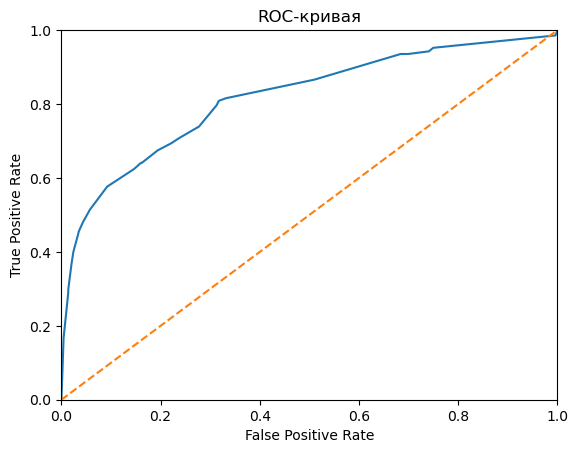

In [21]:
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid_tree) 

plt.plot(fpr, tpr)

plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC-кривая')
plt.show()

Значение `AUC-ROC` = 0.816 свидетельствует о хорошей способности модели различать классы при различных порогах классификации.

Тем не менее, чтобы в полной мере проверить адекватность данной (и последующих) модели сравним ее с дамми-моделью в одном из следующих этапов.

### Рассмотрение случайного леса

Рассмотрим случайный лес и лучшие гиперпараметры для него.

In [22]:
##%%time

best_model_forest = None
best_result_forest = 0
best_depth_forest = 0
best_est_forest = 0
best_predicted_valid_forest = None

for est in range(10, 101, 10):
    for depth in range(1, 16):
        model_forest = RandomForestClassifier(n_estimators=est, max_depth=depth, random_state=12345)
        model_forest.fit(features_train, target_train)
        predicted_valid_forest = model_forest.predict(features_valid)
        result_forest = f1_score(target_valid, predicted_valid_forest)
        if result_forest > best_result_forest:
            best_result_forest = result_forest
            best_depth_forest = depth
            best_est_forest = est
            best_predicted_valid_forest = predicted_valid_forest
            best_model_forest = model_forest
            
  
print(f'Лучший F1: {best_result_forest:.3f}')
print(f'Лучший max_depth: {best_depth_forest}')
print(f'Лучший n_estimators: {best_est_forest}')

Лучший F1: 0.588
Лучший max_depth: 12
Лучший n_estimators: 70


Случайный лес выдал `F1` чуть лучше, чем дерево решений.

Так же рассмотрим для него матрицу ошибок, полноту, точность и `AUC-ROC`.

In [23]:
print(confusion_matrix(target_valid, best_predicted_valid_forest))

[[1534   48]
 [ 224  194]]


In [24]:
print(f'Полнота: {recall_score(target_valid, best_predicted_valid_forest):.3f}')

Полнота: 0.464


In [25]:
print(f'Точность: {precision_score(target_valid, best_predicted_valid_forest):.3f}')

Точность: 0.802


In [26]:
probabilities_valid_forest = best_model_forest.predict_proba(features_valid)
probabilities_one_valid_forest = probabilities_valid_forest[:, 1]
print(f'Показатель AUC-ROC: {roc_auc_score(target_valid, probabilities_one_valid_forest):.3f}')

Показатель AUC-ROC: 0.847


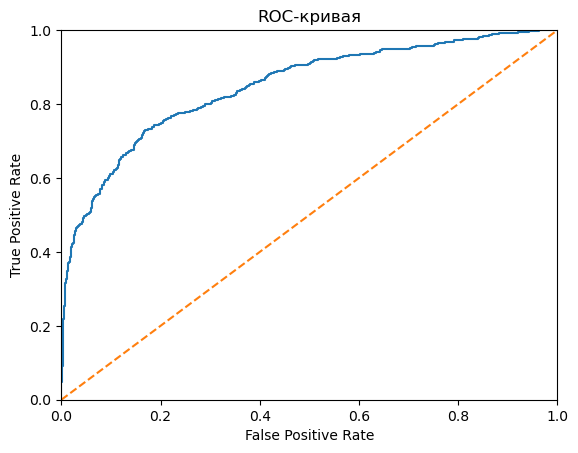

In [27]:
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid_forest) 

plt.plot(fpr, tpr)

plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC-кривая')
plt.show()

Случайный лес показал `F1` = 0.590, что немного лучше дерева решений и соответствует требованию задачи. По матрице ошибок видно, что модель допускает больше ошибок типа `False Negative` (пропускает часть ушедших клиентов), поэтому полнота (`recall` = 0.464) ниже, чем точность (`precision` = 0.808). При этом значение `AUC-ROC` = 0.848 указывает на хорошую способность модели ранжировать клиентов по вероятности ухода.

### Рассмотрение логистической регрессии

Рассмотрим модель логистической регрессии. Так как логистическая регрессия не может стабильно работать без стандартизации - в отношении нее сразу введутся методы борьбы с дисбалансом.

In [28]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

c_values = [0.001, 0.01, 0.1, 1, 10]

best_model_logic = None
best_result_logic = -1
best_c = None
best_predicted_valid_logic = None

for c in c_values:
    model_logic = make_pipeline(
        StandardScaler(with_mean=False),  # безопасно для OHE/sparse
        LogisticRegression(
            random_state=12345,
            C=c,
            max_iter=1000,
            solver='liblinear',
            class_weight='balanced'
        )
    )

    model_logic.fit(features_train, target_train)

    predicted_valid_logic = model_logic.predict(features_valid)
    result_logic = f1_score(target_valid, predicted_valid_logic)

    if result_logic > best_result_logic:
        best_result_logic = result_logic
        best_model_logic = model_logic
        best_c = c
        best_predicted_valid_logic = predicted_valid_logic

print(f'Лучший F1: {best_result_logic:.3f}')
print(f'Лучший C: {best_c}')


Лучший F1: 0.491
Лучший C: 0.1


Модель выдает крайне малое `F1`-значение в сравнении с предыдущими.

Подробнее рассмотрим ее показатели.

In [29]:
print(confusion_matrix(target_valid, best_predicted_valid_logic))

[[1113  469]
 [ 129  289]]


In [30]:
print(f'Полнота: {recall_score(target_valid, best_predicted_valid_logic):.3f}')

Полнота: 0.691


In [31]:
print(f'Точность: {precision_score(target_valid, best_predicted_valid_logic):.3f}')

Точность: 0.381


In [32]:
probabilities_valid_logic = best_model_logic.predict_proba(features_valid)
probabilities_one_valid_logic = probabilities_valid_logic[:, 1]
print(f'Показатель AUC-ROC: {roc_auc_score(target_valid, probabilities_one_valid_logic):.3f}')

Показатель AUC-ROC: 0.760


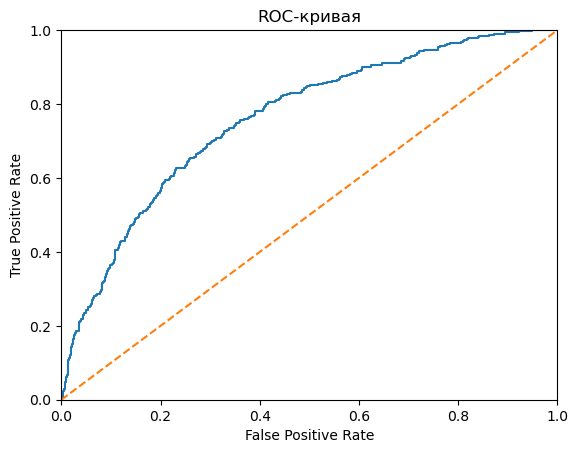

In [33]:
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid_logic) 

plt.plot(fpr, tpr)

plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC-кривая')
plt.show()

Логистическая регрессия показала худший результат среди рассмотренных моделей: F1 ≈ 0.49. По матрице ошибок видно, что модель делает большое число ошибок типа False Positive (ложно прогнозирует отток), из-за чего точность невысокая (precision ≈ 0.38), при этом полнота остаётся высокой (recall ≈ 0.69). Значение ROC-AUC ≈ 0.76 указывает на среднюю способность модели ранжировать клиентов по риску ухода, однако по совокупности метрик логистическая регрессия уступает модели случайного леса.

### Проверка на адекватность

Теперь проверим имеющиеся модели на адекватность. Сравним их с значениями дамми-модели. 

In [34]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

dummy_model = DummyClassifier(strategy='stratified', random_state=12345)
dummy_model.fit(features_train, target_train)

dummy_pred_valid = dummy_model.predict(features_valid)

dummy_proba_valid = dummy_model.predict_proba(features_valid)[:, 1]

print(confusion_matrix(target_valid, dummy_pred_valid))
print(f'Precision Dummy: {precision_score(target_valid, dummy_pred_valid, zero_division=0):.3f}')
print(f'Recall Dummy: {recall_score(target_valid, dummy_pred_valid):.3f}')
print(f'F1 Dummy: {f1_score(target_valid, dummy_pred_valid):.3f}')
print(f'ROC-AUC Dummy: {roc_auc_score(target_valid, dummy_proba_valid):.3f}')


[[1253  329]
 [ 345   73]]
Precision Dummy: 0.182
Recall Dummy: 0.175
F1 Dummy: 0.178
ROC-AUC Dummy: 0.483


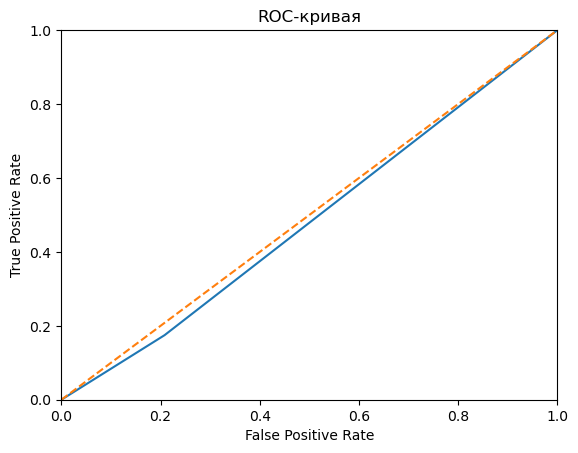

In [35]:
fpr, tpr, thresholds = roc_curve(target_valid, dummy_proba_valid) 

plt.plot(fpr, tpr)

plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC-кривая')
plt.show()

В целом, все модели (даже логистическая регрессия) прошли проверку на адекватность. Модели гораздо лучше определяют точность и реже ложно присваивают положительный класс, а также имеют хорошие показатели `AUC-ROC`. Тем не менее, у всех моделей есть проблемы с полнотой и нахождением положительного класса в целом.

Лес продемонстрировал лучший показатель `F1` и `AUC-ROC`, поэтому на следующих этапах будем рассматривать именно его и проводить над ним преобразования с целью баланса классов.

## Борьба с дисбалансом

### Масштабирование

Проведем стандартизацию (масштабирование) для признаков.

In [36]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

numeric_features = [
    'CreditScore', 'Age', 'Tenure', 'Balance',
    'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'
]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features)
    ]
)

forest_pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('model', best_model_forest
        )
    ]
)

forest_pipeline.fit(features_train, target_train)

pred_valid = forest_pipeline.predict(features_valid)
proba_valid = forest_pipeline.predict_proba(features_valid)[:, 1]

In [37]:
print(confusion_matrix(target_valid, pred_valid))
print(f'F1: {f1_score(target_valid, pred_valid):.3f}')
print(f'ROC-AUC: {roc_auc_score(target_valid, proba_valid):.3f}')

[[1543   39]
 [ 245  173]]
F1: 0.549
ROC-AUC: 0.839


При использовании стандартизации качество модели ухудшилось по сравнению с базовым вариантом.
`F1`-мера снизилась с 0.590 до 0.549, а `AUC-ROC` уменьшился с 0.848 до 0.839, это связано с тем, что использование стандартизации зачастую лишь ухудшает показатели для алгоритма случайного леса.
По матрице ошибок видно, что после масштабирования увеличилось число `False Negative` — модель стала чаще пропускать ушедших клиентов.

### Upsample (Увеличение выборки)

Отдельно рассмотрим два варианта баланса классов - увеличение выборки и балансировка классов как гиперпараметр в модели.

Увеличим класс методом upsample.

Напишем функцию upsample, значения которой используем для модели ниже.

In [38]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

Проверим.

In [39]:
target_upsampled.value_counts()

Exited
0    4804
1    4784
Name: count, dtype: int64

Класс сбалансирован. Обучаем модель используя проверенные наилучшие гиперпараметры.

In [40]:
model_forest_upsampled = RandomForestClassifier(n_estimators=best_est_forest, max_depth=best_depth_forest, random_state=12345)

model_forest_upsampled.fit(features_upsampled, target_upsampled)

predicted_valid_forest_upsampled = model_forest_upsampled.predict(features_valid)
print(f'F1: {f1_score(target_valid, predicted_valid_forest_upsampled):.3f}')

F1: 0.603


Результат вырос почти на 2%, что можно оценить положительно.

Посмотрим, как изменились другие показатели.

In [41]:
print(f'Recall: {recall_score(target_valid, predicted_valid_forest_upsampled):.3f}')
print(f'Precision: {precision_score(target_valid, predicted_valid_forest_upsampled):.3f}')

Recall: 0.620
Precision: 0.587


In [42]:
probabilities_valid_forest_upsampled = model_forest_upsampled.predict_proba(features_valid)
probabilities_one_valid_forest_upsampled = probabilities_valid_forest_upsampled[:, 1]
print(f'ROC-AUC: {roc_auc_score(target_valid, probabilities_one_valid_forest_upsampled):.3f}')

ROC-AUC: 0.845


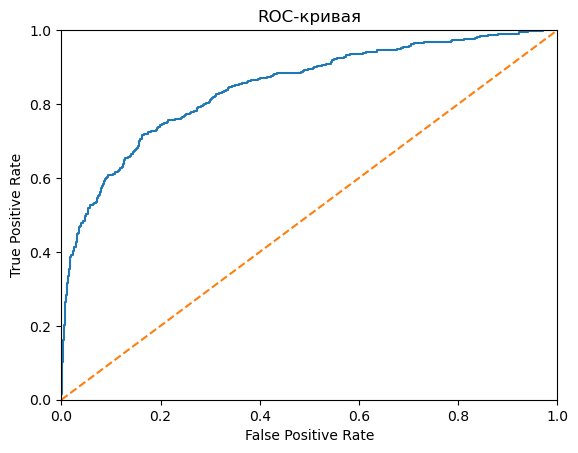

In [43]:
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid_forest_upsampled) 

plt.plot(fpr, tpr)

plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC-кривая')
plt.show()

Увеличив выборку, мы значительно повысили полноту, понизив точность. `AUC-ROC` остался примерно на прежнем уровне.

Теперь рассмотрим с точки зрения порогов.

In [44]:
for threshold in np.arange(0, 1, 0.02):
    predicted_valid = probabilities_one_valid_forest_upsampled > threshold
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)
    f1 = f1_score(target_valid, predicted_valid)

    print("Порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f}, F1 = {:.2f}".format(
        threshold, precision, recall, f1))

Порог = 0.00 | Точность = 0.209, Полнота = 1.000, F1 = 0.35
Порог = 0.02 | Точность = 0.214, Полнота = 0.998, F1 = 0.35
Порог = 0.04 | Точность = 0.227, Полнота = 0.990, F1 = 0.37
Порог = 0.06 | Точность = 0.238, Полнота = 0.976, F1 = 0.38
Порог = 0.08 | Точность = 0.251, Полнота = 0.969, F1 = 0.40
Порог = 0.10 | Точность = 0.264, Полнота = 0.962, F1 = 0.41
Порог = 0.12 | Точность = 0.279, Полнота = 0.945, F1 = 0.43
Порог = 0.14 | Точность = 0.293, Полнота = 0.935, F1 = 0.45
Порог = 0.16 | Точность = 0.307, Полнота = 0.919, F1 = 0.46
Порог = 0.18 | Точность = 0.318, Полнота = 0.900, F1 = 0.47
Порог = 0.20 | Точность = 0.332, Полнота = 0.883, F1 = 0.48
Порог = 0.22 | Точность = 0.352, Полнота = 0.880, F1 = 0.50
Порог = 0.24 | Точность = 0.369, Полнота = 0.866, F1 = 0.52
Порог = 0.26 | Точность = 0.386, Полнота = 0.854, F1 = 0.53
Порог = 0.28 | Точность = 0.405, Полнота = 0.830, F1 = 0.54
Порог = 0.30 | Точность = 0.418, Полнота = 0.804, F1 = 0.55
Порог = 0.32 | Точность = 0.432, Полнота

Наилучшее значение `F1` (62%) приближенно к стандартному порогу в 0.54. Можно сделать вывод, что небольшое увеличение порога способно улучшить результат.

Сравним с другим методом.

### Балансировка гиперпараметром "class_weight"

Рассмотрим `F1`-значение полученной модели при использовании гиперпараметра `class_weight='balanced'`

In [45]:
model_forest_balanced = RandomForestClassifier(n_estimators=best_est_forest, max_depth=best_depth_forest, random_state=12345, class_weight='balanced')
model_forest_balanced.fit(features_train, target_train)
predicted_valid_balanced = model_forest_balanced.predict(features_valid)
print(f'F1: {f1_score(target_valid, predicted_valid_balanced):.3f}')

F1: 0.613


Получилось хорошее значение, превышающее метод `upsample`. Также проверим другие показатели.

In [46]:
print(confusion_matrix(target_valid, predicted_valid_balanced))

print(f'Recall: {recall_score(target_valid, predicted_valid_balanced):.3f}')
print(f'Precision: {precision_score(target_valid, predicted_valid_balanced):.3f}')


[[1477  105]
 [ 187  231]]
Recall: 0.553
Precision: 0.688


In [47]:
probabilities_valid_balanced = model_forest_balanced.predict_proba(features_valid)
probabilities_one_valid_balanced = probabilities_valid_balanced[:, 1]

print(f'ROC-AUC: {roc_auc_score(target_valid, probabilities_one_valid_balanced):.3f}')


ROC-AUC: 0.848


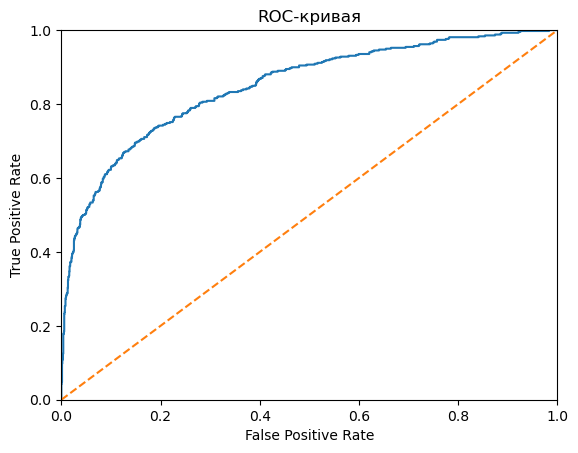

In [48]:
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid_balanced)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()


In [49]:
import numpy as np

for threshold in np.arange(0, 1, 0.02):
    predicted_valid_threshold = (probabilities_one_valid_balanced > threshold).astype(int)

    precision = precision_score(target_valid, predicted_valid_threshold)
    recall = recall_score(target_valid, predicted_valid_threshold)
    f1 = f1_score(target_valid, predicted_valid_threshold)

    print(
        f'Порог = {threshold:.2f}, '
        f'Точность = {precision:.3f}, '
        f'Полнота = {recall:.3f}, '
        f'F1 = {f1:.3f}'
    )


Порог = 0.00, Точность = 0.209, Полнота = 1.000, F1 = 0.346
Порог = 0.02, Точность = 0.221, Полнота = 0.998, F1 = 0.361
Порог = 0.04, Точность = 0.235, Полнота = 0.983, F1 = 0.379
Порог = 0.06, Точность = 0.250, Полнота = 0.976, F1 = 0.398
Порог = 0.08, Точность = 0.265, Полнота = 0.955, F1 = 0.415
Порог = 0.10, Точность = 0.284, Полнота = 0.945, F1 = 0.437
Порог = 0.12, Точность = 0.298, Полнота = 0.928, F1 = 0.451
Порог = 0.14, Точность = 0.315, Полнота = 0.914, F1 = 0.468
Порог = 0.16, Точность = 0.334, Полнота = 0.900, F1 = 0.487
Порог = 0.18, Точность = 0.356, Полнота = 0.880, F1 = 0.507
Порог = 0.20, Точность = 0.368, Полнота = 0.847, F1 = 0.513
Порог = 0.22, Точность = 0.389, Полнота = 0.833, F1 = 0.530
Порог = 0.24, Точность = 0.413, Полнота = 0.809, F1 = 0.546
Порог = 0.26, Точность = 0.435, Полнота = 0.794, F1 = 0.562
Порог = 0.28, Точность = 0.458, Полнота = 0.766, F1 = 0.573
Порог = 0.30, Точность = 0.484, Полнота = 0.746, F1 = 0.588
Порог = 0.32, Точность = 0.512, Полнота 

Балансировка классов с помощью параметра `class_weight='balanced'` показала наилучший результат. `F1`-мера увеличилась до 0.613 за счёт роста полноты (recall = 0.553), при этом значение `ROC-AUC` (0.848) осталось на уровне базовой модели. Анализ порогов показал, что оптимальное значение `F1` достигается при пороге ниже стандартного 0.5, что подтверждает важность настройки порога для задач с дисбалансом классов.

Модель используется для оценки вероятности ухода клиента. На этапе внедрения в продакшене решение о классификации принимается на основе порога вероятности, который может быть адаптирован под бизнес-цели. Анализ различных порогов показал, что снижение порога позволяет увеличить полноту при допустимом снижении точности.

Именно этот метод будем использовать для финального тестирования, необходимо отметить, что именно он лучше всего работает с методом случайного леса.

## Тестирование модели

Рассмотрим модель случайного леса, в которой использовался параметр `class_weight='balanced'`.

In [50]:
predicted_test_forest_balanced = model_forest_balanced.predict(features_test)
print(f'F1: {f1_score(target_test, predicted_test_forest_balanced):.3f}')

F1: 0.581


Значение чуть хуже чем на валидации, но скорее всего это связано с порогами.

Рассмотрим показатели для тестового результата.

In [51]:
print(confusion_matrix(target_test, predicted_test_forest_balanced))

[[1472  105]
 [ 207  216]]


In [52]:
print(f'Recall: {recall_score(target_test, predicted_test_forest_balanced):.3f}')
print(f'Precision: {precision_score(target_test, predicted_test_forest_balanced):.3f}')

Recall: 0.511
Precision: 0.673


In [53]:
probabilities_test_forest_balanced = model_forest_balanced.predict_proba(features_test)
probabilities_one_test_forest_balanced = probabilities_test_forest_balanced[:, 1]
print(f'ROC-AUC: {roc_auc_score(target_test, probabilities_one_test_forest_balanced):.3f}')

ROC-AUC: 0.852


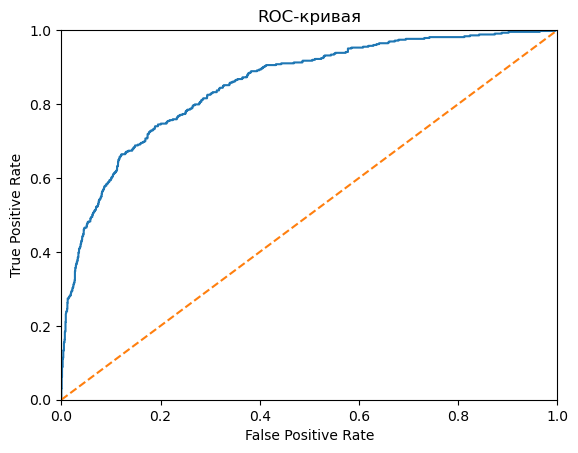

In [54]:
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test_forest_balanced) 

plt.plot(fpr, tpr)

plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC-кривая')
plt.show()

In [55]:
for threshold in np.arange(0, 1, 0.02):
    predicted_test = probabilities_one_test_forest_balanced > threshold
    precision = precision_score(target_test, predicted_test)
    recall = recall_score(target_test, predicted_test)
    f1 = f1_score(target_test, predicted_test)

    print("Порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f}, F1 = {:.2f}".format(
        threshold, precision, recall, f1))

Порог = 0.00 | Точность = 0.211, Полнота = 1.000, F1 = 0.35
Порог = 0.02 | Точность = 0.222, Полнота = 0.995, F1 = 0.36
Порог = 0.04 | Точность = 0.237, Полнота = 0.988, F1 = 0.38
Порог = 0.06 | Точность = 0.256, Полнота = 0.981, F1 = 0.41
Порог = 0.08 | Точность = 0.275, Полнота = 0.974, F1 = 0.43
Порог = 0.10 | Точность = 0.293, Полнота = 0.955, F1 = 0.45
Порог = 0.12 | Точность = 0.307, Полнота = 0.939, F1 = 0.46
Порог = 0.14 | Точность = 0.326, Полнота = 0.922, F1 = 0.48
Порог = 0.16 | Точность = 0.347, Полнота = 0.910, F1 = 0.50
Порог = 0.18 | Точность = 0.371, Полнота = 0.901, F1 = 0.53
Порог = 0.20 | Точность = 0.388, Полнота = 0.872, F1 = 0.54
Порог = 0.22 | Точность = 0.409, Полнота = 0.851, F1 = 0.55
Порог = 0.24 | Точность = 0.429, Полнота = 0.825, F1 = 0.56
Порог = 0.26 | Точность = 0.445, Полнота = 0.790, F1 = 0.57
Порог = 0.28 | Точность = 0.467, Полнота = 0.764, F1 = 0.58
Порог = 0.30 | Точность = 0.487, Полнота = 0.747, F1 = 0.59
Порог = 0.32 | Точность = 0.513, Полнота

D:\Conda\envs\ds\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


При стандартном пороге классификации 0.5 модель случайного леса показала на тестовой выборке F1 ≈ 0.58, precision ≈ 0.67 и recall ≈ 0.51 при значении ROC-AUC ≈ 0.85. При понижении порога до 0.4 значение F1 увеличивается до ≈ 0.62 за счёт роста полноты до ≈ 0.66 при умеренном снижении точности до ≈ 0.59. Аналогично результатам на валидационной выборке, снижение порога позволяет лучше выявлять клиентов, склонных к оттоку, и улучшает итоговый баланс между точностью и полнотой. Это подтверждает целесообразность использования пониженного порога классификации для данной модели.

### Факторы, влияющие на уход клиентов.


Рассмотрим значение отдельных факторов для ухода клиентов.

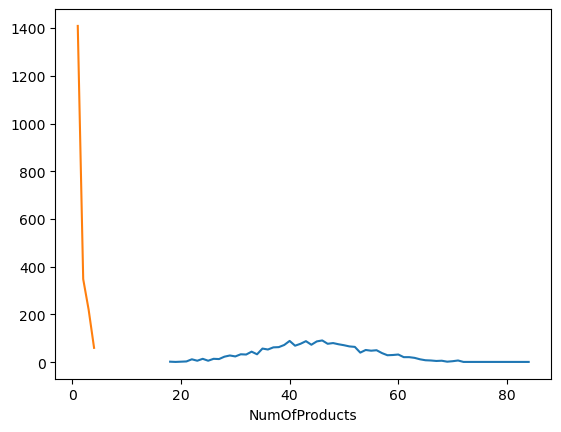

In [71]:
data_analysis = data.query('Exited == 1')
data_analysis.groupby('Age')['Exited'].count().plot()
data_analysis.groupby('NumOfProducts')['Exited'].count().plot();


На первом этапе был выполнен первичный разведочный анализ клиентов, покинувших банк. Были рассмотрены распределения возраста и количества используемых банковских продуктов среди ушедших клиентов. Данный анализ позволяет получить общее представление о структуре оттока, однако не учитывает влияние признаков в совокупности. Для более точного и интерпретируемого анализа факторов ухода далее используется SHAP-анализ.

In [62]:
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

model = model_forest_balanced          
X = features_valid.copy()              

explainer = shap.TreeExplainer(model)
sv = explainer(X)   

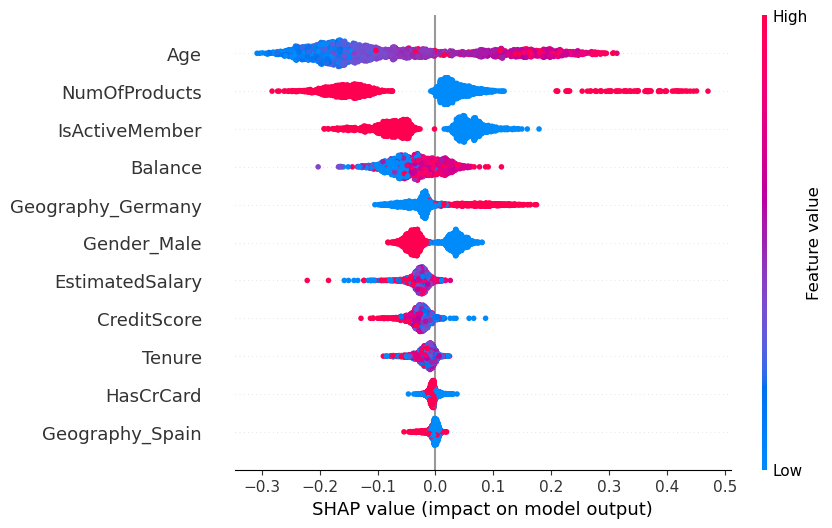

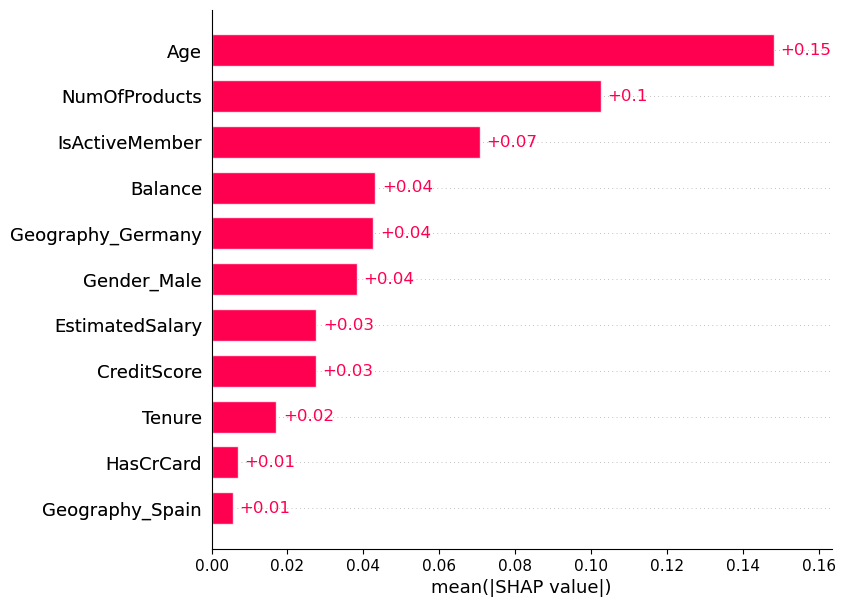

In [64]:
sv_pos = sv[..., 1]   

shap.plots.beeswarm(sv_pos, max_display=15)
shap.plots.bar(sv_pos, max_display=15)

Глобальный SHAP-анализ показал, что наибольшее влияние на вероятность ухода клиентов оказывают возраст, количество используемых банковских продуктов и активность клиента. Эти признаки вносят наибольший вклад в предсказания модели и значительно превосходят остальные факторы по среднему абсолютному SHAP-значению. Таким образом, именно данные характеристики являются ключевыми при оценке риска оттока клиентов.

Beeswarm-график позволяет определить направление влияния факторов на вероятность ухода. Было установлено, что увеличение возраста клиента в определённом диапазоне, большое количество банковских продуктов, а также отсутствие активности клиента повышают риск оттока. В то же время низкий возраст, активное использование услуг банка и меньшее число продуктов, как правило, снижают вероятность ухода.

In [65]:
mean_abs = np.abs(sv_pos.values).mean(axis=0)
shap_importance = pd.DataFrame({
    "feature": X.columns,
    "mean_abs_shap": mean_abs
}).sort_values("mean_abs_shap", ascending=False)

shap_importance.head(15)


,feature,mean_abs_shap
1,Age,0.148199
4,NumOfProducts,0.102547
6,IsActiveMember,0.070669
3,Balance,0.043191
8,Geography_Germany,0.042587
10,Gender_Male,0.038259
7,EstimatedSalary,0.027556
0,CreditScore,0.027404
2,Tenure,0.017040
5,HasCrCard,0.006946


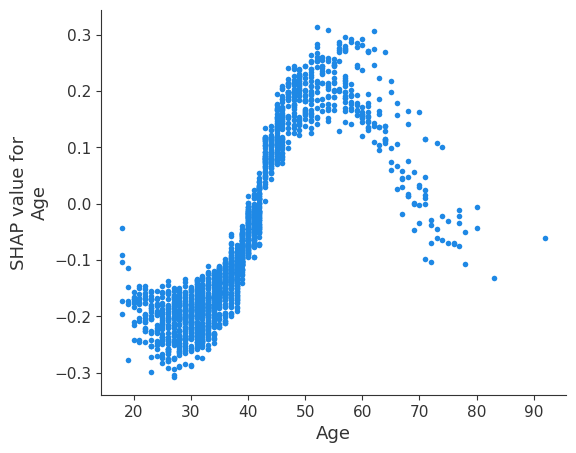

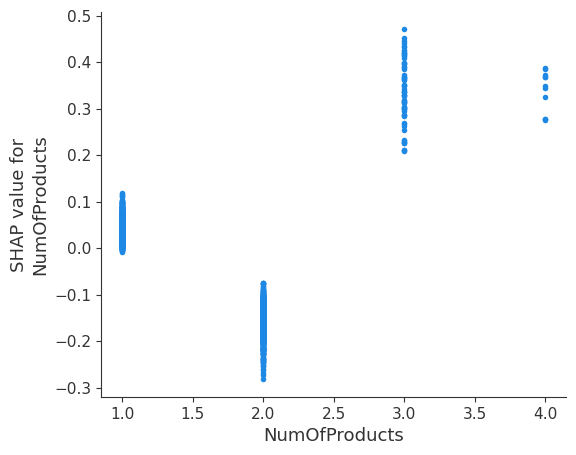

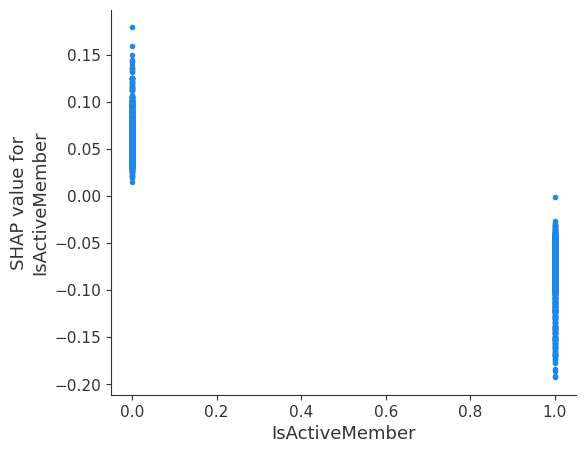

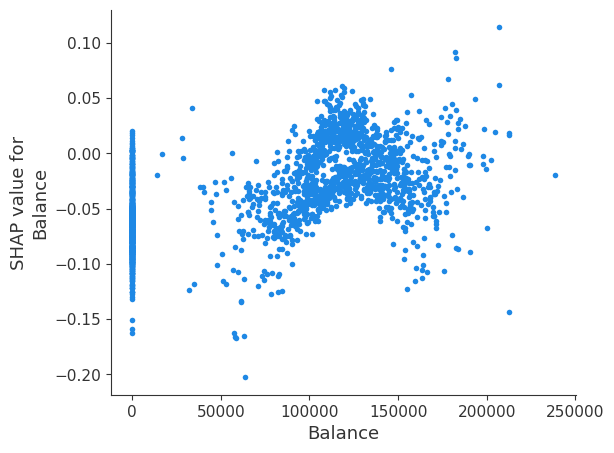

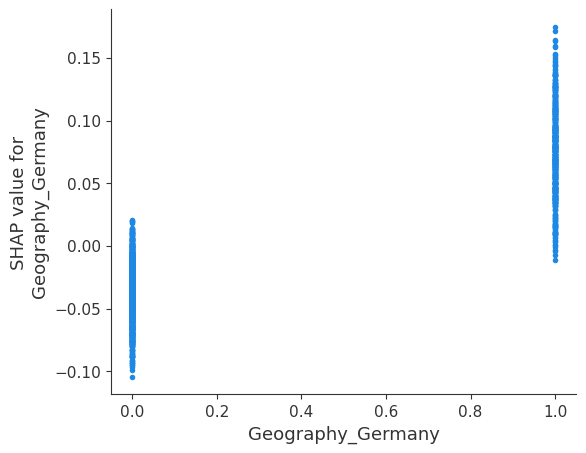

In [66]:
for feat in shap_importance["feature"].head(5):
    shap.dependence_plot(
        feat,
        sv_pos.values,
        X,
        interaction_index=None,
        show=True
    )


Анализ зависимостей SHAP-значений от отдельных признаков показал выраженные нелинейные эффекты. Наибольший риск оттока наблюдается у клиентов среднего возраста, тогда как молодые и пожилые клиенты уходят реже. Клиенты с 3–4 продуктами имеют более высокий индивидуальный риск ухода по модели, но таких клиентов мало, поэтому по “количеству ушедших” они не доминируют. Также выявлено, что неактивные клиенты и клиенты с высоким балансом на счёте чаще склонны к оттоку.

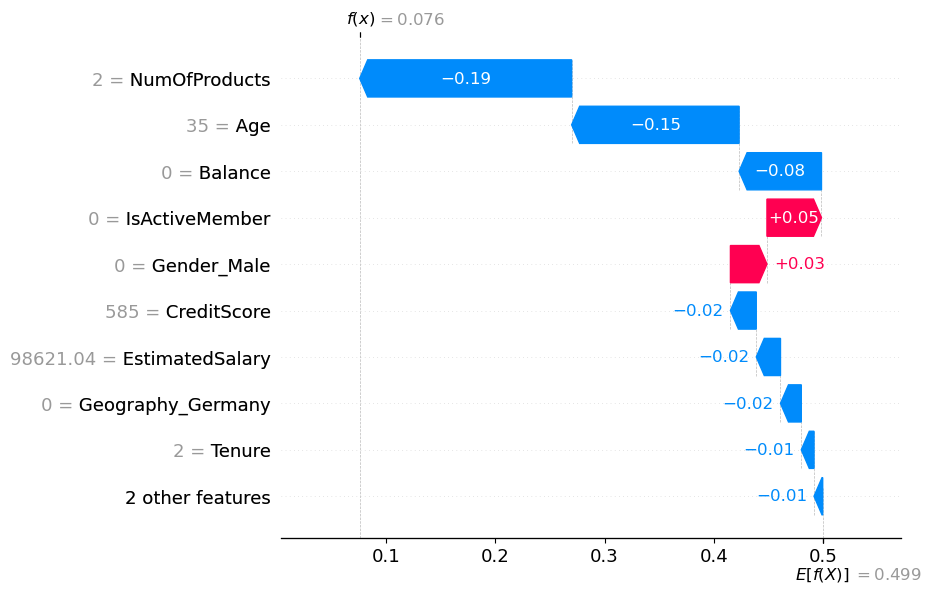

In [67]:
i = 0
shap.plots.waterfall(sv_pos[i], max_display=10)


Локальный SHAP-анализ для отдельного клиента показал, какие именно факторы повлияли на итоговое решение модели. В рассматриваемом примере снижение вероятности ухода обусловлено возрастом клиента, количеством используемых продуктов и отсутствием баланса на счёте, тогда как отсутствие активности и некоторые демографические характеристики увеличивают риск оттока. Это демонстрирует способность модели не только делать прогноз, но и объяснять его для каждого конкретного клиента.

В совокупности SHAP-анализ подтвердил адекватность выбранной модели и позволил выявить ключевые факторы, влияющие на уход клиентов, а также характер их воздействия. Полученные результаты хорошо согласуются с бизнес-логикой и могут быть использованы для разработки мер по удержанию клиентов.

Также рассмотрим и обычные графики.

In [73]:
data_analysis = data.query('Exited == 1')

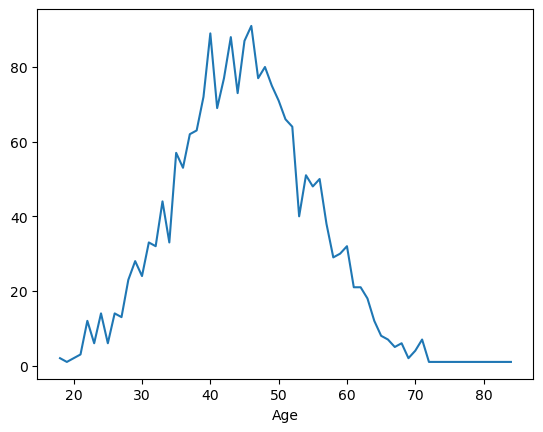

In [74]:
data_analysis.groupby('Age')['Exited'].count().plot();

Уходят в основном люди зрелого возраста (40+). Причем люди преклонного возраста (60+) в эту группу не относятся.

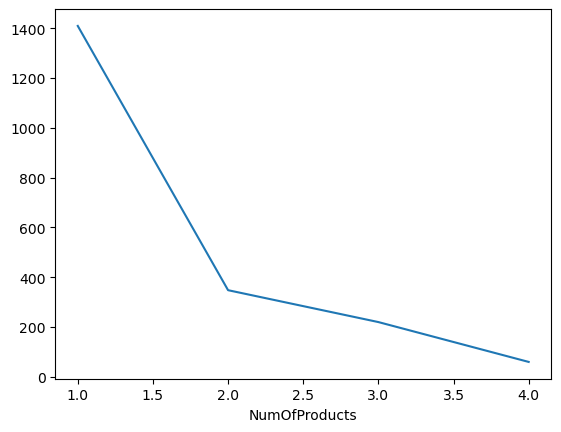

In [75]:
data_analysis.groupby('NumOfProducts')['Exited'].count().plot();

Гораздо реже уходят люди, имеющие хотя бы 2 продукта банка.

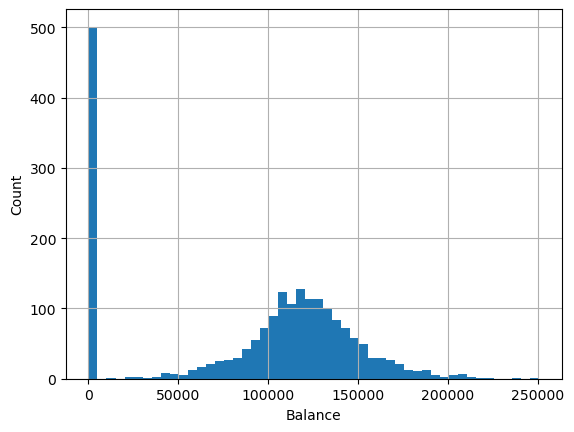

In [80]:
data_analysis['Balance'].hist(bins=50)
plt.xlabel('Balance')
plt.ylabel('Count')
plt.show()


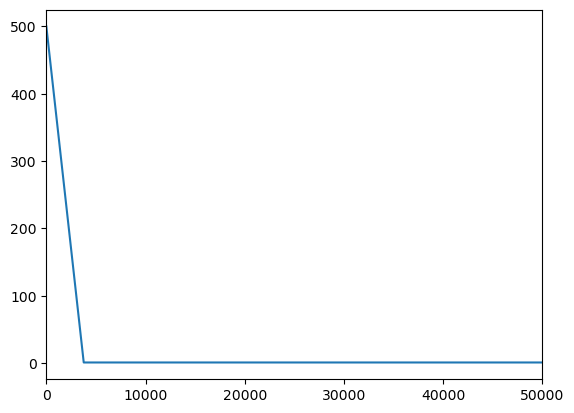

In [76]:
plt.plot(data_analysis.groupby('Balance')['Exited'].sum())
plt.xlim([0, 50000]);

Помимо пика в области нулевого баланса, на гистограмме также наблюдается распределение ушедших клиентов с положительным балансом, сконцентрированное в среднем диапазоне значений, что указывает на наличие оттока и среди клиентов со значительными средствами на счёте.

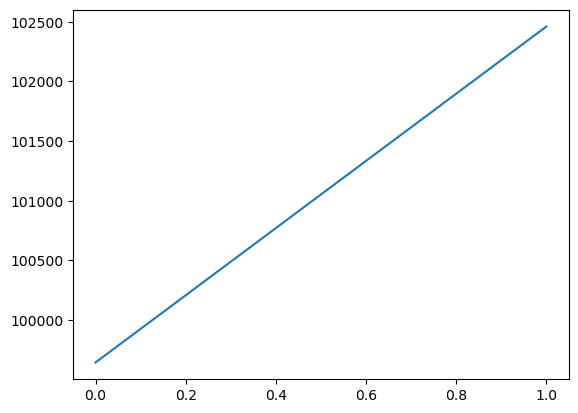

In [77]:
plt.plot(data.groupby('Exited')['EstimatedSalary'].median());
plt.xlim();
plt.ylim();

Уходят, как правило, люди, имеющую большую ожидаемую зарплату.

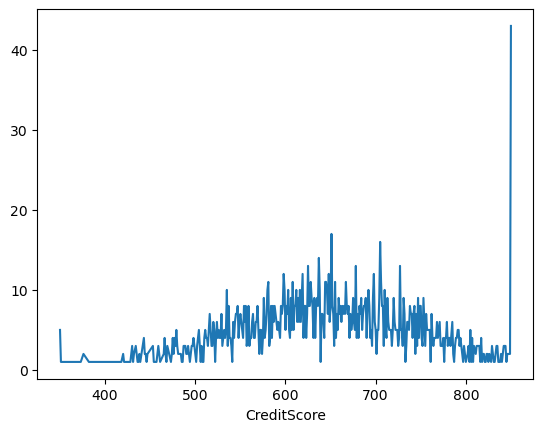

In [78]:
data_analysis.groupby('CreditScore')['Exited'].sum().plot();

Большая часть ушедших имела кредитоспособность в районе от 600 до 700. Также можно наблюдать аномально большое значение ушедших в районе максимальной кредитоспообности (850). Однако в целом данный фактор оказывает менее выраженное влияние по сравнению с ключевыми признаками, выявленными SHAP-анализом.

Данные отражают распределение ушедших клиентов по признакам и показывают, какие группы доминируют численно. В то же время `SHAP dependence plots` позволяют оценить индивидуальный вклад признаков в риск ухода при прочих равных условиях. Поэтому, например, клиенты с 3–4 продуктами встречаются реже, но имеют более высокий индивидуальный риск ухода, что не противоречит результатам данных графиков.

Также можно сделать вывод о том, что банку необходимо сосредоточиться на удержании зрелой возрастной группы.

## Вывод

В ходе выполнения проекта по прогнозированию оттока клиентов банка были получены следующие результаты:

1. На этапе подготовки данных были загружены и проанализированы исходные данные, обработаны пропуски и категориальные признаки, а также выполнено кодирование признаков, необходимых для обучения моделей.

2. Для решения задачи классификации с дисбалансом классов были протестированы различные подходы, включая использование параметра class_weight='balanced' и апсемплинг, при этом наилучшие и наиболее стабильные результаты на валидационной и тестовой выборках показала модель случайного леса с балансировкой классов.

3. Дополнительно был проведён подбор порога классификации, что позволило улучшить итоговое значение F1-метрики за счёт повышения полноты, что особенно важно в задаче прогнозирования оттока клиентов.

4. Качество итоговой модели было оценено на тестовой выборке с использованием метрик F1-score и ROC-AUC, которые подтвердили адекватность выбранного подхода и возможность практического применения модели.

5. Для интерпретации результатов была проведена аналитика факторов оттока с использованием как простых статистических графиков, так и SHAP-анализа, что позволило не только определить наиболее значимые признаки, но и понять направление и характер их влияния на вероятность ухода клиента.

6. Анализ показал, что ключевыми факторами оттока являются возраст клиента, количество используемых продуктов банка, активность клиента, баланс на счёте и регион проживания, при этом SHAP-анализ позволил уточнить нелинейные зависимости, которые не всегда очевидны из обычных графиков.

В результате была построена интерпретируемая модель прогнозирования оттока, которая может быть использована банком для выявления клиентов с повышенным риском ухода и разработки мер по их удержанию.